In [1]:
# Attempt to plot Khumbu dataset
%matplotlib notebook

In [24]:
# Import modules - make sure you activated your rasterenv environment!
from osgeo import gdal
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

from pygeotools.lib import iolib, warplib, geolib, timelib, malib

#### DEM sources:
32 m DEM derived from WorldView Stereo imagery acquired from 2003 to 2016

In [27]:
# directory of data
data_dir = 'dem_32_transOnly/'
filenames = os.listdir(data_dir)
dem_fn_list2 = []
for file in filenames:
    print(file)
    fn = file
    dem_fn_list2.append(fn)
# print(dem_fn_list2)
    

20150607_0458_1030010043A29500_10300100436B1D00-DEM_32m_trans.tif
20151018_0514_1050010001B64900_1050010001B64A00-DEM_32m_trans.tif
20121228_0506_102001001FB33300_102001002097D600-DEM_32m_trans.tif
20131229_0456_10200100296A0900_10200100298D5F00-DEM_32m_trans.tif
20141018_0511_1050410011888400_1050410011888300-DEM_32m_trans.tif
20150115_0456_1040010006A12900_104001000665F400-DEM_32m_trans.tif
20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif
20140324_0453_102001002D263400_102001002C1E2100-DEM_32m_trans.tif
20151023_0456_1050010001C29900_1050010001C29B00-DEM_32m_trans.tif
20151111_0448_1050010002153D00_1050010002153F00-DEM_32m_trans.tif
20150204_0555_102001003A5B7900_1020010039598B00-DEM_32m_trans.tif
20140303_0447_1020010029AC1C00_102001002BD01800-DEM_32m_trans.tif
20140311_0520_103001002E546F00_103001002C956F00-DEM_32m_trans.tif
20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif
20150527_0504_1030010043122E00_1030010040B19300-DEM_32m_trans.tif
20161025_0

In [3]:
# # Input DEM filenames - manual from tutorial, no longer needed
# dem_2003_fn = 'dem_32_transOnly/20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif'
# dem_2012_fn = 'dem_32_transOnly/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif'
# dem_2014_fn = 'dem_32_transOnly/20141022_0518_1020010036518E00_102001003525D400-DEM_32m_trans.tif'
# dem_2016_fn = 'dem_32_transOnly/20161025_0524_104001002469AD00_1040010024438E00-DEM_32m_trans.tif'

# dem_fn_list = [dem_2003_fn, dem_2014_fn, dem_2016_fn]

In [4]:
# ds_list = warplib.memwarp_multi_fn(dem_fn_list, extent='intersection', res='min', t_srs=dem_2016_fn)

ds_list = warplib.memwarp_multi_fn(dem_fn_list2, extent='intersection', res='min', t_srs=dem_2016_fn)


Warping all inputs to the following:
Resolution: 32.0
Extent: [483025.303, 3087761.676, 490835.841, 3094831.672]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 3: dem_32_transOnly/20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif
nl: 221 ns: 244 res: 32.000
2 of 3: dem_32_transOnly/20141022_0518_1020010036518E00_102001003525D400-DEM_32m_trans.tif
nl: 221 ns: 244 res: 32.000
3 of 3: dem_32_transOnly/20161025_0524_104001002469AD00_1040010024438E00-DEM_32m_trans.tif
nl: 221 ns: 244 res: 32.000


In [5]:
# Load datasets to NumPy masked arrays
dem_2003, dem_2014, dem_2016 = [iolib.ds_getma(i) for i in ds_list]
dem_list = [dem_2003, dem_2014, dem_2016]

In [6]:
print(dem_2014.shape)
print(dem_2014.dtype)

(221, 244)
float32


In [7]:
dem_2014 # check out that the masked values were noted in a mask layer from the iolib thing

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., 4998.255859375, 4996.1240234375,
         5004.39501953125],
        [--, --, --, ..., 4989.328125, 4984.91796875, 4992.2021484375],
        [--, --, --, ..., 4983.916015625, 4981.494140625,
         4982.77783203125]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=0.0,
  dtype=float32)

In [8]:
# generate 3 panel plot for input arrays
#Function to generate a 3-panel plot for input arrays
def plot3panel(dem_list, clim=None, titles=None, cmap='inferno', label=None, overlay=None, fn=None):
    fig, axa = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,5))
    alpha = 1.0
    for n, ax in enumerate(axa):
        #Gray background
        ax.set_facecolor('0.5')
        #Force aspect ratio to match images
        ax.set(adjustable='box-forced', aspect='equal')
        #Turn off axes labels/ticks
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if titles is not None:
            ax.set_title(titles[n])
        #Plot background shaded relief map
        if overlay is not None:
            alpha = 0.7
            axa[n].imshow(overlay[n], cmap='gray', clim=(1,255)) 
    #Plot each array 
    im_list = [axa[i].imshow(dem_list[i], clim=clim, cmap=cmap, alpha=alpha) for i in range(len(dem_list))]
    fig.tight_layout()
    fig.colorbar(im_list[0], ax=axa.ravel().tolist(), label=label, extend='both', shrink=0.5)
    if fn is not None:
        fig.savefig(fn, bbox_inches='tight', pad_inches=0, dpi=150)

<IPython.core.display.Javascript object>


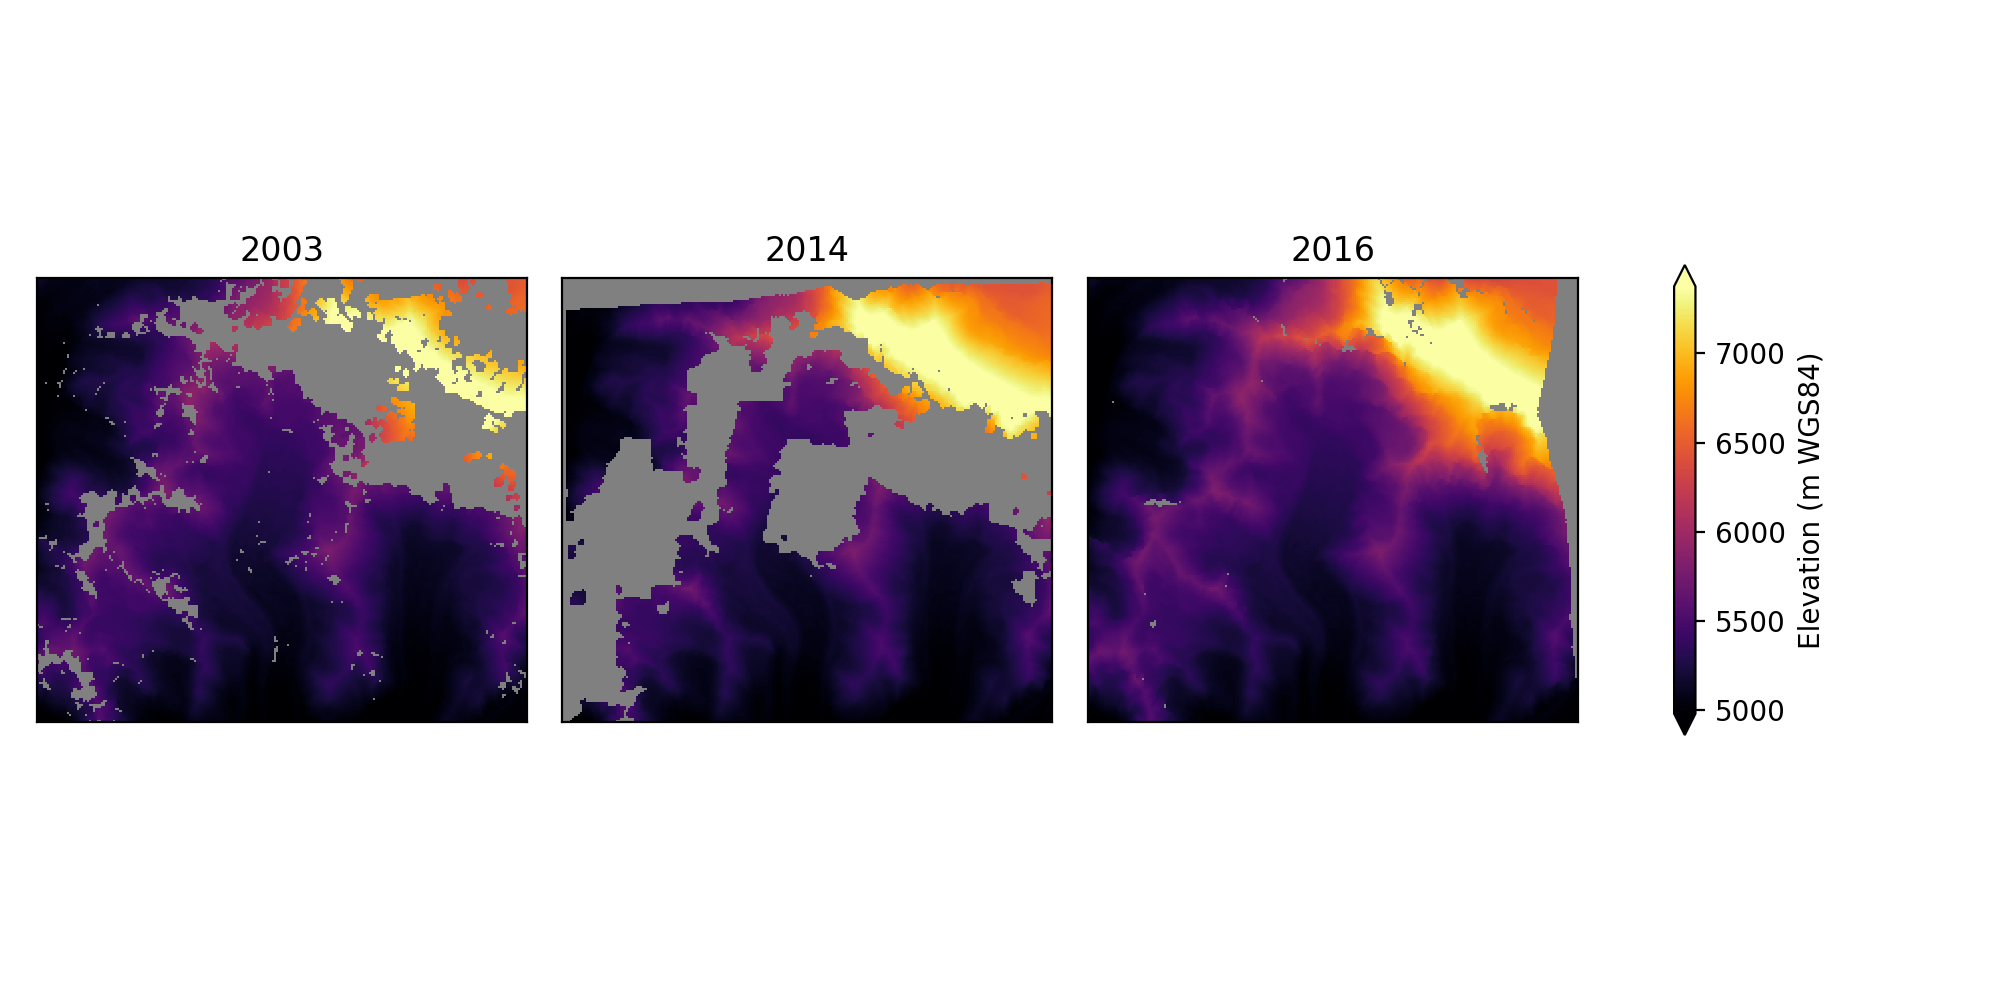

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [16]:
titles = ['2003', '2014', '2016']
clim = malib.calcperc(dem_list[0], (2,98))
plot3panel(dem_list, clim, titles, 'inferno', 'Elevation (m WGS84)', fn='dem.png')

<IPython.core.display.Javascript object>


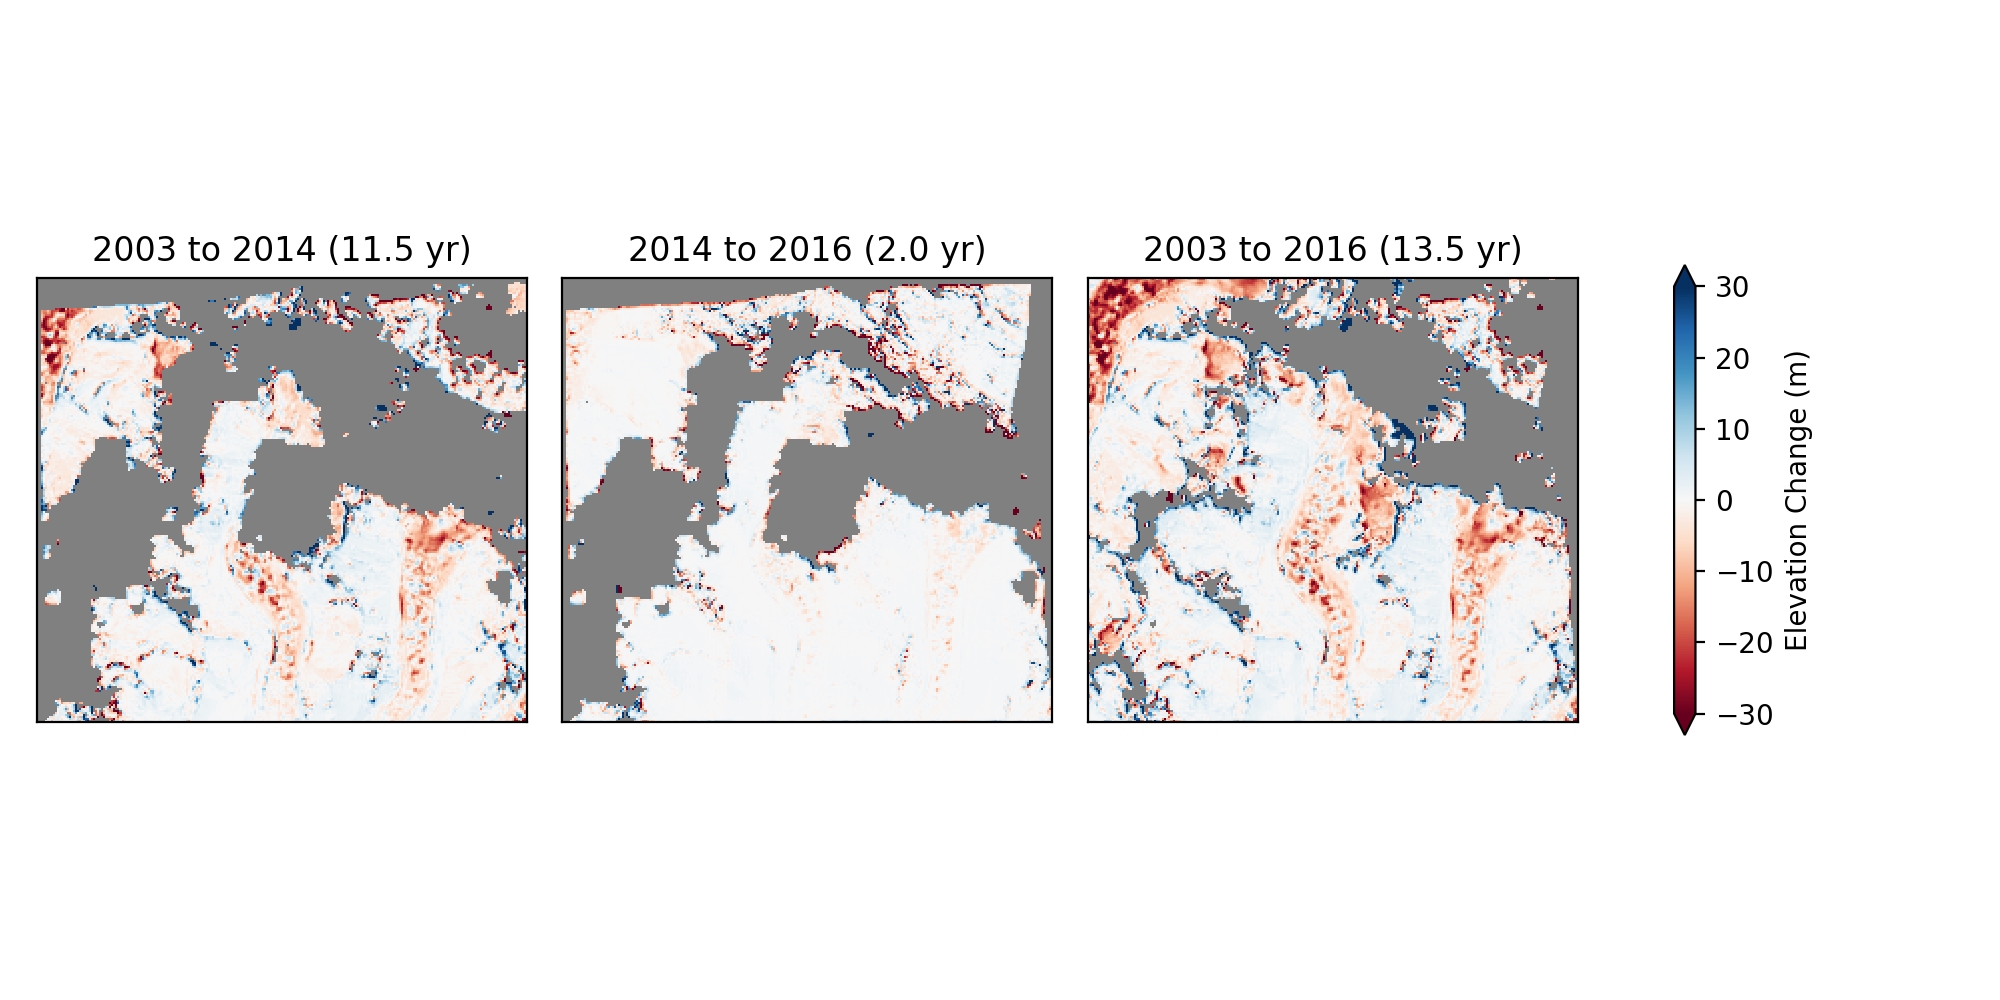

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [17]:
#Calculate elevation difference for each time period
#In this case, we will store the difference maps in a list for convenience
dh_list = [dem_2014 - dem_2003, dem_2016 - dem_2014, dem_2016 - dem_2003]

#Let's extract timestamps from filenames
t_list = np.array([timelib.fn_getdatetime(fn) for fn in dem_fn_list])
#Now let's compute total time between observations in decimal years
#Compute time differences, convert decimal years
dt_list = [timelib.timedelta2decyear(d) for d in np.diff(t_list)]
#Add the full 1970-2015 time difference
dt_list.append(dt_list[0]+dt_list[1])

#Now plot the elevation differences 
titles = ['2003 to 2014 (%0.1f yr)' % dt_list[0], '2014 to 2016 (%0.1f yr)' % dt_list[1], '2003 to 2016 (%0.1f yr)' % dt_list[2]]
plot3panel(dh_list, (-30, 30), titles, 'RdBu', 'Elevation Change (m)', fn='dem_dh.png')


<IPython.core.display.Javascript object>


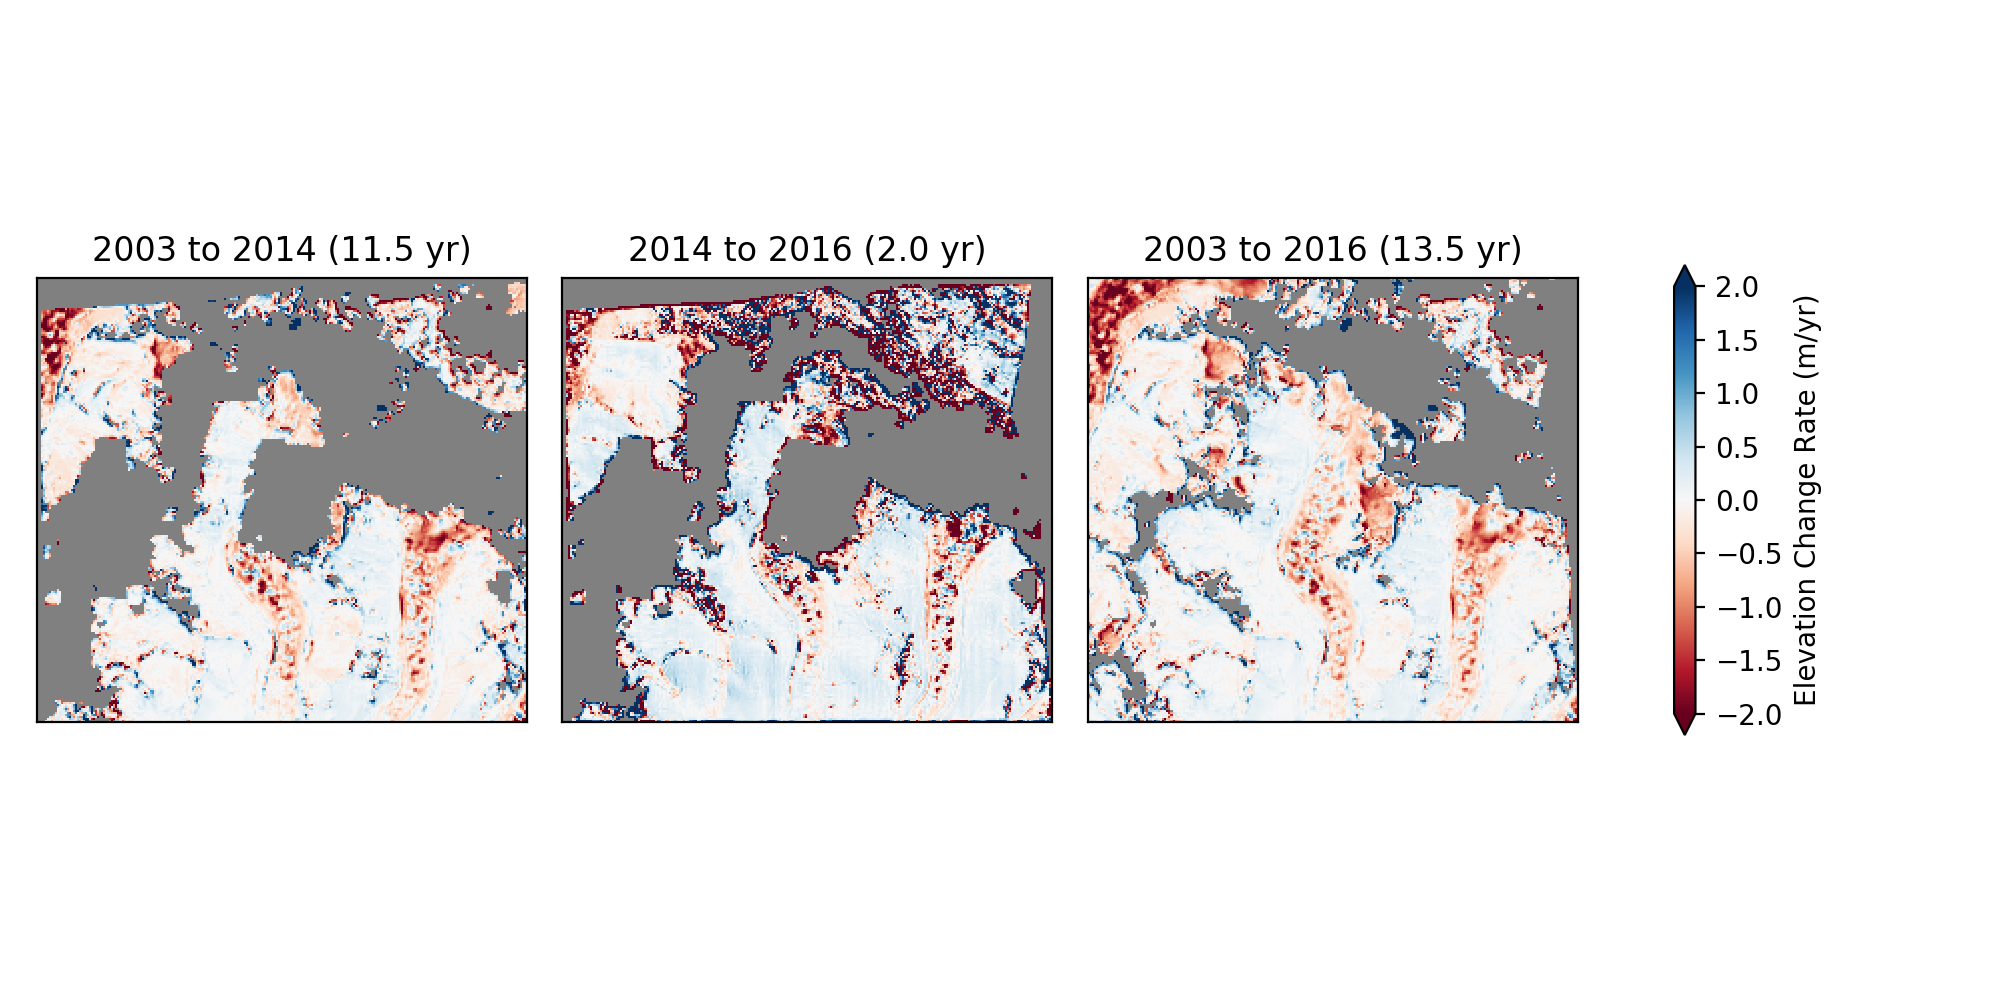

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [18]:
#Calculate annual rate of change
dhdt_list = np.ma.array(dh_list)/np.array(dt_list)[:,np.newaxis,np.newaxis]
plot3panel(dhdt_list, (-2, 2), titles, 'RdBu', 'Elevation Change Rate (m/yr)', fn='dem_dhdt.png')

In [12]:
# NOTE this is commented out because there is no shapefile pre-created for our khumbu glacier

# shp_fn = 'data/rainier/rgi60_glacierpoly_rainier.shp'
# #Create binary mask from polygon shapefile to match our warped raster datasets
# shp_mask = geolib.shp2array(shp_fn, ds_list[0])
# #Now apply the mask to each array 
# dhdt_list_shpclip = [np.ma.array(dhdt, mask=shp_mask) for dhdt in dhdt_list]
# plot3panel(dhdt_list_shpclip, (-2, 2), titles, 'RdBu', 'Elevation Change Rate (m/yr)', fn='dem_dhdt_shpclip.png')

<IPython.core.display.Javascript object>


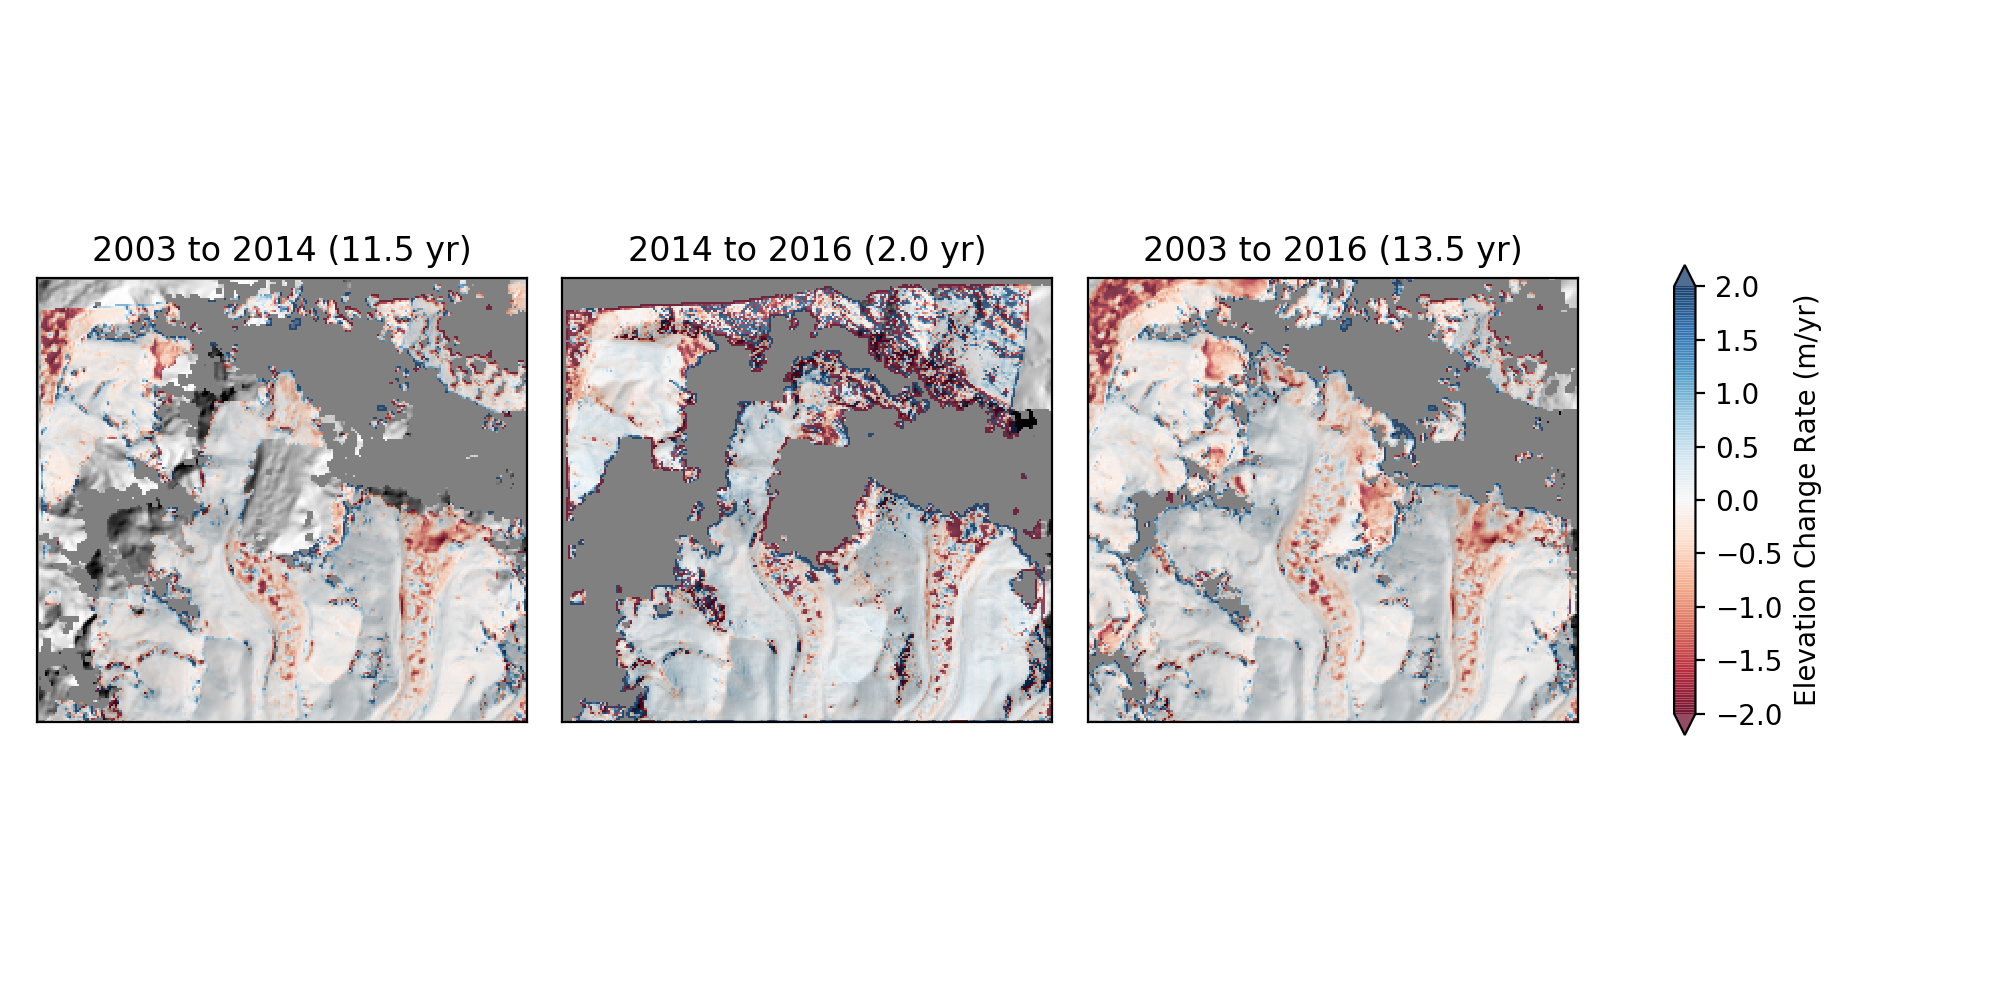

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [19]:
dem_2003_hs_ds = gdal.DEMProcessing('', ds_list[0], 'hillshade', format='MEM')
dem_2003_hs = iolib.ds_getma(dem_2003_hs_ds)
dem_2014_hs_ds = gdal.DEMProcessing('', ds_list[1], 'hillshade', format='MEM')
dem_2014_hs = iolib.ds_getma(dem_2014_hs_ds)
hs_list = [dem_2003_hs, dem_2014_hs, dem_2003_hs]

#Plot our rates over shaded relief maps
plot3panel(dhdt_list, (-2, 2), titles, 'RdBu', 'Elevation Change Rate (m/yr)', overlay=hs_list, fn='dem_dhdt_shpclip_hs.png')

In [20]:
#Extract x and y pixel resolution (m) from geotransform
gt = ds_list[0].GetGeoTransform()
px_res = (gt[1], -gt[5])
#Calculate pixel area in m^2
px_area = px_res[0]*px_res[0]
# dhdt_list_shpclip = np.ma.array(dhdt_list_shpclip).reshape(len(dhdt_list_shpclip), dhdt_list_shpclip[0].shape[0]*dhdt_list_shpclip[1].shape[1])

In [21]:
#Now, lets multiple pixel area by the observed elevation change for all valid pixels over glaciers
dhdt_mean = dhdt_list.mean(axis=1)
#Compute area in km^2
area_total = px_area * dhdt_list.count(axis=1) / 1E6
#Volume change rate in km^3/yr
vol_rate = dhdt_mean * area_total / 1E3

print(type(vol_rate))
print(type(area_total))
print(type(dt_list))

# #Volume change in km^3 - issues here.
vol_total = vol_rate * dt_list 
# #Assume intermediate density between ice and snow for volume change (Gt)
# rho = 0.850
# mass_rate = vol_rate * rho
# mass_total = vol_total * rho

# #Print some numbers (clean this up)
# out = zip(titles, dhdt_mean, area_total, vol_rate, vol_total, mass_rate, mass_total)
# for i in out:
#     print(i[0])
#     print('%0.2f m/yr mean elevation change rate' % i[1])
#     print('%0.2f km^2 total area' % i[2])
#     print('%0.2f km^3/yr mean volume change rate' % i[3])
#     print('%0.2f km^3 total volume change' % i[4])
#     print('%0.2f Gt/yr mean mass change rate' % i[5])
#     print('%0.2f Gt total mass change\n' % i[6])

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ndarray'>
<class 'list'>


ValueError: operands could not be broadcast together with shapes (3,244) (3,) 